In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import numpy as np
import pandas as pd
import tqdm
from scipy import optimize

In [106]:
def f_linear(X, a, b):
    return a*X + b

def f_rational(X, a, b):
    return a/(1+b*X)

In [107]:
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)
x = np.linspace(0, 1, 101)
y = np.zeros(101)
y_no_noise = np.zeros(101)

In [108]:
eps = 0.001

In [109]:
for i in range(len(x)):
    y[i] = alpha*x[i] + beta + np.random.normal(0, 1)
    
for i in range(len(x)):
    y_no_noise[i] = alpha*x[i] + beta

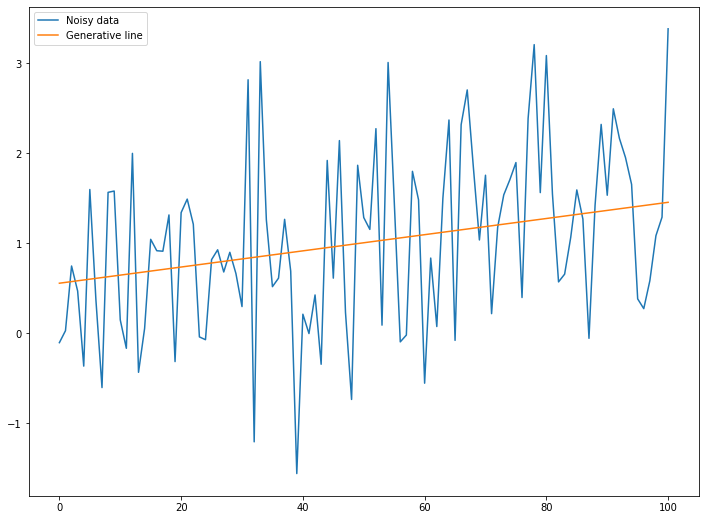

In [110]:
plt.figure(figsize=(12,9))
plt.plot(y, label='Noisy data')
plt.plot(y_no_noise, label='Generative line')
plt.legend()

In [111]:
def least_squares_linear(ab):
    a, b = ab
    global x, y 
    lst_sqr = [(f_linear(x[i],a,b) - y[i]) ** 2 for i in range(len(x))]       
    return np.sum(lst_sqr)


def least_squares_rational(ab):
    a, b = ab
    global x, y 
    lst_sqr = [(f_rational(x[i],a,b) - y[i]) ** 2 for i in range(len(x))]       
    return np.sum(lst_sqr)

In [143]:
m = 0
c = 0

L = 0.02  # The learning Rate
epochs = int(1/eps)  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

In [112]:
lin_CG_x, lin_CG_b = optimize.minimize(least_squares_linear, [0, 0], method='CG', options={'disp' : True}).x

Optimization terminated successfully.
         Current function value: 88.581096
         Iterations: 4
         Function evaluations: 24
         Gradient evaluations: 8


In [113]:
lin_BFGS_x, lin_BFGS_b = optimize.minimize(least_squares_linear, [0, 0], method='BFGS', options={'disp' : True}).x

Optimization terminated successfully.
         Current function value: 88.581096
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6


In [114]:
popt, pcov = optimize.curve_fit(f_linear, x, y, method='lm')

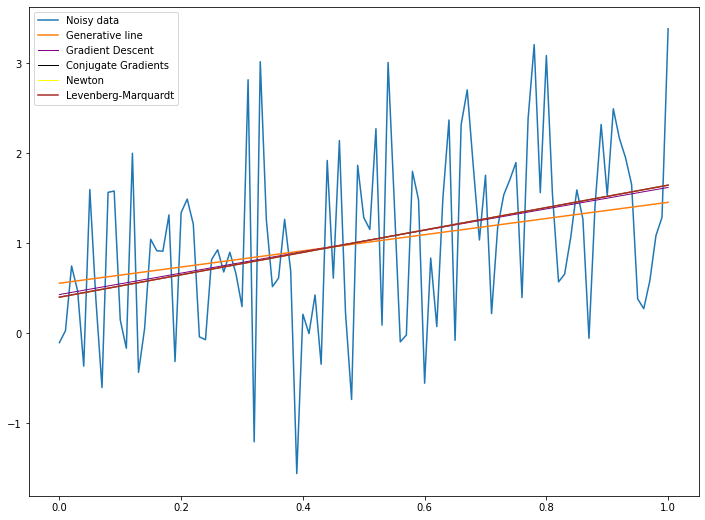

In [144]:
plt.figure(figsize=(12,9))

plt.plot(x, y, label='Noisy data')
plt.plot(x, y_no_noise, label='Generative line')


plt.plot(x, [f_linear(x[i], m, c) for i in  range(len(x))], label='Gradient Descent', color='purple', linewidth=1)
plt.plot(x, [f_linear(x[i], lin_CG_x, lin_CG_b) for i in  range(len(x))], label='Conjugate Gradients', color='black', linewidth=1)
plt.plot(x, [f_linear(x[i], lin_BFGS_x, lin_BFGS_b) for i in  range(len(x))], label='Newton', color='yellow', linewidth=1)
plt.plot(x, f_linear(x, *popt), label='Levenberg-Marquardt', color='brown')

plt.legend()

In [ ]:
m = 0
c = 0

L = 0.02  # The learning Rate
epochs = int(1/eps)  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

In [116]:
rat_CG_x, rat_CG_b = optimize.minimize(least_squares_rational, [0, 0], method='CG', options={'disp' : True}).x
rat_BFGS_x, rat_BFGS_b = optimize.minimize(least_squares_rational, [0, 0], method='BFGS', options={'disp' : True}).x
r_popt, r_pcov = optimize.curve_fit(f_rational, x, y, method='lm')

Optimization terminated successfully.
         Current function value: 89.814089
         Iterations: 13
         Function evaluations: 107
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 89.814089
         Iterations: 11
         Function evaluations: 51
         Gradient evaluations: 17


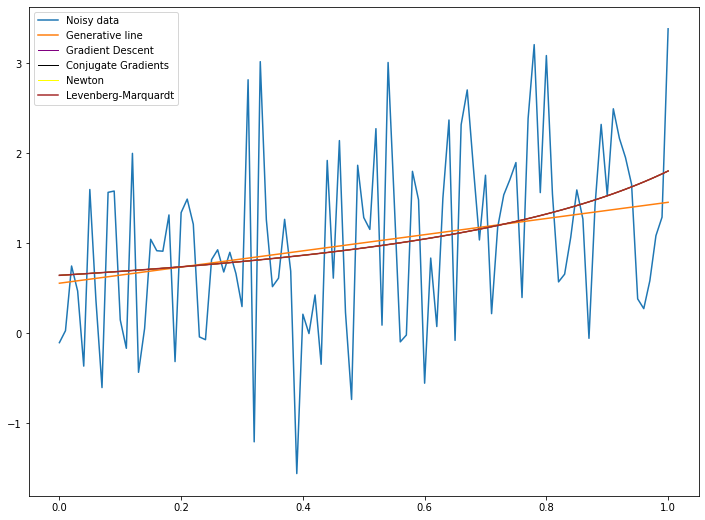

In [145]:
plt.figure(figsize=(12,9))

plt.plot(x, y, label='Noisy data')
plt.plot(x, y_no_noise, label='Generative line')

plt.plot(x, [f_rational(x[i], rat_GS_x, rat_GS_b) for i in  range(len(x))], label='Gradient Descent', color='purple', linewidth=1)
plt.plot(x, [f_rational(x[i], rat_CG_x, rat_CG_b) for i in  range(len(x))], label='Conjugate Gradients', color='black', linewidth=1)
plt.plot(x, [f_rational(x[i], rat_BFGS_x, rat_BFGS_b) for i in  range(len(x))], label='Newton', color='yellow', linewidth=1)
plt.plot(x, f_rational(x, *r_popt), label='Levenberg-Marquardt', color='brown')
plt.legend()